In [1]:
import tensorcraft as tc
import numpy as np
import matplotlib.pyplot as plt


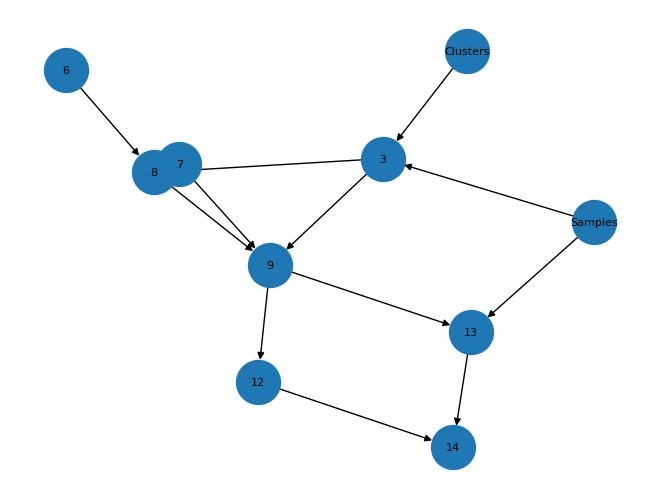

In [2]:
import importlib
import matplotlib.pyplot as plt
import networkx as nx

importlib.reload(tc)
from tensorcraft.compiler.compiler import DataGraphTransformer
code = """
# Distance computation
Dist[j,k] = (Samples[j,l] - Clusters[k,l]) * (Samples[j,l] - Clusters[k,l])

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] = (Dist[j,k] < Min[j]) * (Dist[j,k] - Min[j])
Labels[j] = (Dist[j,k] == Min[j]) * (k - Labels[j])

# Cluster update
Count[l] = (Labels[j] == l)
Update[l,k] = Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
tree = tc.compile(code)

dataGraph, vars, inputs, ops = DataGraphTransformer(code).transform(tree)
# pos = nx.drawing.bfs_layout(dataGraph, "X", align="vertical")
nx.draw_kamada_kawai(dataGraph, with_labels=True, font_size=8, node_size=1000)

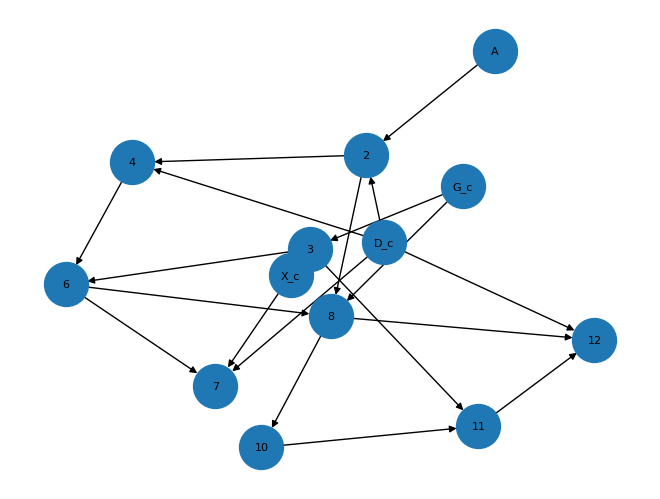

In [3]:

import importlib
import matplotlib.pyplot as plt
import networkx as nx

importlib.reload(tc)
from tensorcraft.compiler.compiler import DataGraphTransformer
code = """
W_c[i] = A[i,j] * D_c[j]
Gamma_c = G_c[i] * G_c[i]
Theta_c = D_c[i] * W_c[i]

Alpha_c = Gamma_c / Theta_c
X_n[i] = X_c[i] + Alpha_c * D_c[i]
G_n[i] = G_c[i] + Alpha_c * W_c[i]

Gamma_n = G_n[i] * G_n[i]
Beta_n = Gamma_n / Gamma_c
Delta_n = Beta_n * D_c[i] - G_n[i]
"""
tree = tc.compile(code)

dataGraph, vars, inputs, tensor_exp = DataGraphTransformer(code).transform(tree)
# pos = nx.drawing.bfs_layout(dataGraph, "X", align="vertical")
nx.draw_kamada_kawai(dataGraph, with_labels=True, font_size=8, node_size=1000)